In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()   

print(len(x_train))  # x_train 배열의 크기를 출력

2.6.0
60000


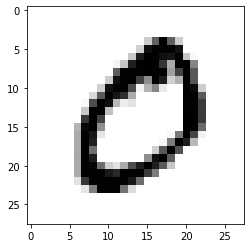

In [2]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [3]:
print(y_train[1])

0


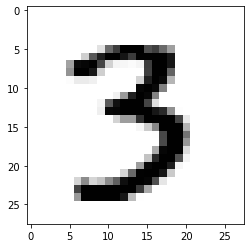

10001 번째 이미지의 숫자는 바로  3 입니다.


In [4]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
print(x_test.shape)

(10000, 28, 28)


In [7]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [8]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


In [9]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [11]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1916 - accuracy: 0.9412
Epoch 2/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0613 - accuracy: 0.9812
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0455 - accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0222 - accuracy: 0.9929
Epoch 7/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0132 - accuracy: 0.9957
Epoch 10/10
1875/1875 [==============================] - 19s 10ms

In [13]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

313/313 - 1s - loss: 0.0408 - accuracy: 0.9892
test_loss: 0.040808819234371185 
test_accuracy: 0.9891999959945679


In [14]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1.8151639e-12 5.5750138e-10 3.1829012e-11 1.7846653e-12 2.0586586e-13
 6.3929175e-14 5.7885184e-19 1.0000000e+00 1.9661709e-12 1.2645588e-09]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


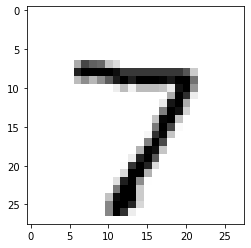

In [15]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.9351790e-04 3.0130913e-02 4.0825662e-01 6.3911779e-05 5.0324597e-05
 1.1882969e-08 9.8725836e-09 4.3649234e-02 4.9897078e-01 1.8684639e-02]
라벨: 1, 예측결과: 8


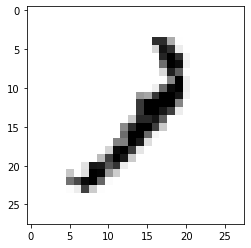

예측확률분포: [3.3112160e-06 1.1040177e-05 3.1273776e-05 1.6915998e-05 9.3362748e-11
 2.4169941e-10 1.5883885e-12 1.6005516e-01 8.3987367e-01 8.6603295e-06]
라벨: 7, 예측결과: 8


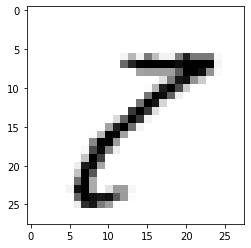

예측확률분포: [4.62946015e-10 1.78568182e-09 2.92514049e-08 9.76488855e-14
 1.59394475e-07 6.44779369e-12 4.17247975e-18 1.43521905e-01
 1.03509095e-07 8.56477797e-01]
라벨: 7, 예측결과: 9


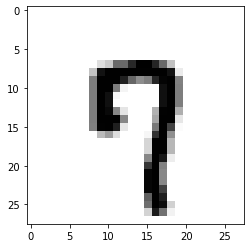

예측확률분포: [3.20816152e-02 1.05745009e-07 1.15071096e-01 3.65731907e-08
 7.72568107e-01 5.03217699e-08 9.83458571e-03 6.57384226e-05
 2.08307127e-03 6.82955459e-02]
라벨: 9, 예측결과: 4


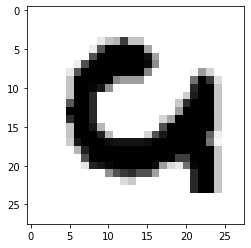

예측확률분포: [1.6078973e-08 1.2281056e-05 1.4730264e-02 1.8963679e-10 1.1889265e-05
 6.7316934e-09 2.0311619e-08 9.8524553e-01 3.3737830e-09 2.7643744e-12]
라벨: 2, 예측결과: 7


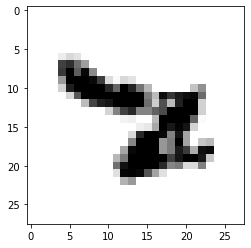

In [16]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [17]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25632     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [23]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn import svm
svm_model = svm.SVC()
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
import pandas as pd


In [24]:
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

digits = load_digits()
wine = load_wine()
breast_cancer = load_breast_cancer()

- .keys()를 이용해 어떤 정보들이 있는 지 확인할 수 있다. 손글씨 데이터는 7개의 정보가 담겨있다.

In [25]:
digits.keys() # 데이터 확인: ['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR']

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [26]:
digits_data = digits.data
digits_data.shape # 데이터 형태: (1797, 64)

(1797, 64)

In [27]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [28]:
print(digits_data[0])      # 0번째 데이터 확인
print(len(digits_data[0])) # shape에서 확인한 64와 동일

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
64


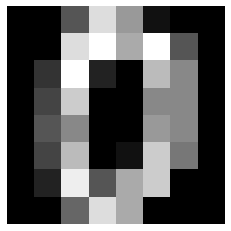

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show() # 숫자 0의 이미지가 있는 것을 확인

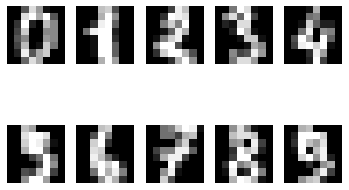

In [30]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show() # 0 ~ 9 숫자를 확인

In [32]:
digits_label = digits.target
print(digits_label.shape) # (1797,)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:

digits_X_train, digits_X_test, digits_y_train, digits_y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)
print('X_train 개수: ', len(digits_X_train), ', X_test 개수: ', len(digits_X_test))

X_train 개수:  1437 , X_test 개수:  360


# 다양한 모델로 학습시키기

## Decision Tree

In [34]:

decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(digits_X_train, digits_y_train)
digits_y_pred = decision_tree.predict(digits_X_test)

print('                      손글씨 분류-의사결정트리')
print('              ---------------------------------------')
print('\t')
print(classification_report(digits_y_test, digits_y_pred))

                      손글씨 분류-의사결정트리
              ---------------------------------------
	
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



In [35]:

from sklearn.metrics import confusion_matrix

confusion_matrix(digits_y_test, digits_y_pred)

array([[42,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  3,  1,  0,  1,  1,  0,  0,  2],
       [ 0,  0, 33,  2,  0,  0,  1,  1,  2,  1],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  1,  0, 35,  0,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0, 26,  0,  0,  0],
       [ 0,  0,  0,  1,  2,  1,  0, 27,  0,  2],
       [ 0,  5,  4,  1,  1,  0,  3,  0, 28,  1],
       [ 0,  1,  1,  2,  2,  1,  0,  0,  0, 25]], dtype=int64)

##  Random Forest

In [36]:
random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(digits_X_train, digits_y_train)
digits_y_pred = random_forest.predict(digits_X_test)

print('                      손글씨 분류-랜덤포레스트')
print('              ---------------------------------------')
print('\t')
print(classification_report(digits_y_test, digits_y_pred))

                      손글씨 분류-랜덤포레스트
              ---------------------------------------
	
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



## SVM

In [37]:
svm_model.fit(digits_X_train, digits_y_train)
digits_y_pred = svm_model.predict(digits_X_test)

print('                          손글씨 분류-SVM')
print('              ---------------------------------------')
print('\t')
print(classification_report(digits_y_test, digits_y_pred))

                          손글씨 분류-SVM
              ---------------------------------------
	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



## SGD Classifier

In [38]:
sgd_model.fit(digits_X_train, digits_y_train)
digits_y_pred = sgd_model.predict(digits_X_test)

print('                        손글씨 분류-SGD Clasifier')
print('              ---------------------------------------')
print('\t')
print(classification_report(digits_y_test, digits_y_pred))

                        손글씨 분류-SGD Clasifier
              ---------------------------------------
	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.83      0.81      0.82        42
           2       0.98      1.00      0.99        40
           3       0.96      0.79      0.87        34
           4       1.00      1.00      1.00        37
           5       0.90      1.00      0.95        28
           6       1.00      0.93      0.96        28
           7       0.91      0.97      0.94        33
           8       0.76      0.86      0.80        43
           9       0.90      0.81      0.85        32

    accuracy                           0.92       360
   macro avg       0.92      0.92      0.92       360
weighted avg       0.92      0.92      0.92       360



## Logistic Regression

In [39]:

logistic_model.fit(digits_X_train, digits_y_train)
digits_y_pred = logistic_model.predict(digits_X_test)

print('                   손글씨 분류-Logistic Regression')
print('              ---------------------------------------')
print('\t')
print(classification_report(digits_y_test, digits_y_pred))

                   손글씨 분류-Logistic Regression
              ---------------------------------------
	
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



C:\Users\qazxc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
